<a href="https://colab.research.google.com/github/sadansabo/AI/blob/main/Climate_Change_Sentiment_Analysis_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets torch torchvision torchaudio
!pip install gradio newspaper3k matplotlib wordcloud
!pip install spacy
!python -m spacy download en_core_web_sm


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 57.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 8.4 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13540 sha256=5e34018c9c6f12ceb52dccb2e6916194b37ebf77b5d132a6eb160f9f6bc94640
  Stored in directory: /root/.cache/pip/wheels/a5/91/9f/00d66475960891a64867914273fcaf78df6cb04d905b104a2a
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3341 sha256=e5dd6ab5681d30e8d4f16011167a0856ecdc9652b7726aa18c9cb2a4c26f1604
  Stored in directory: /root/.cache/pip/wheels/9f/9f/fb/364871d7426d3cdd4d293dcf7e53d97f16

In [14]:
!pip install scikit-learn joblib pandas matplotlib seaborn


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/cherrymorales/Twitter_Climate_Change_Sentiment/main/twitter_sentiment_data.csv"
df = pd.read_csv(url)
print(df.head(), df['sentiment'].value_counts())


   sentiment                                            message  \
0         -1  @tiniebeany climate change is an interesting h...   
1          1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   
2          1  Fabulous! Leonardo #DiCaprio's film on #climat...   
3          1  RT @Mick_Fanning: Just watched this amazing do...   
4          2  RT @cnalive: Pranita Biswasi, a Lutheran from ...   

              tweetid  
0  792927353886371840  
1  793124211518832641  
2  793124402388832256  
3  793124635873275904  
4  793125156185137153   sentiment
 1    22962
 2     9276
 0     7715
-1     3990
Name: count, dtype: int64


In [20]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Remove URLs, mentions, hashtags, RT
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"RT[\s]+", "", text)

    # Remove punctuation, numbers, and lowercase
    text = text.lower()
    text = re.sub(r"[%s]" % re.escape(string.punctuation), " ", text)
    text = re.sub(r"\d+", "", text)

    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    return " ".join(tokens)

df["cleaned_message"] = df["message"].apply(clean_text)
print(df[["message", "cleaned_message"]].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                             message  \
0  @tiniebeany climate change is an interesting h...   
1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   
2  Fabulous! Leonardo #DiCaprio's film on #climat...   
3  RT @Mick_Fanning: Just watched this amazing do...   
4  RT @cnalive: Pranita Biswasi, a Lutheran from ...   

                                     cleaned_message  
0  climate change interesting hustle global warmi...  
1  watch right travels world tackle climate chang...  
2  fabulous leonardo film change brilliant watch via  
3  watched amazing documentary leonardodicaprio c...  
4  pranita biswasi lutheran odisha gives testimon...  


In [21]:
from sklearn.model_selection import train_test_split

X = df["cleaned_message"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ("clf", LogisticRegression(max_iter=200))
])

model.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=200))])

              precision    recall  f1-score   support

          -1       0.73      0.37      0.49       798
           0       0.55      0.38      0.45      1543
           1       0.71      0.86      0.78      4593
           2       0.72      0.68      0.70      1855

    accuracy                           0.69      8789
   macro avg       0.68      0.57      0.60      8789
weighted avg       0.69      0.69      0.68      8789



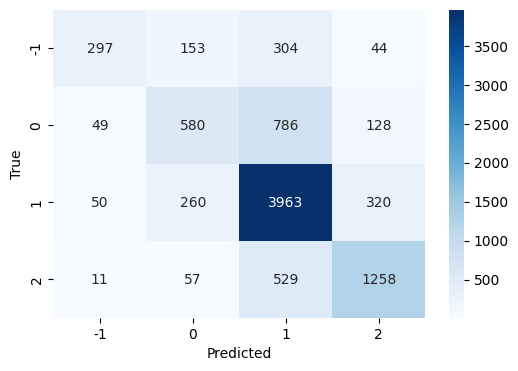

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



In [24]:
import joblib

joblib.dump(model, "climate_sentiment_model.joblib")


['climate_sentiment_model.joblib']

In [25]:
# Step 1: Preprocessing
import re
import nltk
import string
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#", "", text)        # remove hashtags symbol
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)  # remove punctuation
    text = re.sub(r"\d+", "", text)      # remove numbers
    text = " ".join([w for w in text.split() if w not in stop_words]) # remove stopwords
    return text

df['clean_message'] = df['message'].astype(str).apply(clean_text)

print(df[['message','clean_message']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             message  \
0  @tiniebeany climate change is an interesting h...   
1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   
2  Fabulous! Leonardo #DiCaprio's film on #climat...   
3  RT @Mick_Fanning: Just watched this amazing do...   
4  RT @cnalive: Pranita Biswasi, a Lutheran from ...   

                                       clean_message  
0  climate change interesting hustle global warmi...  
1  rt watch beforetheflood right travels world ta...  
2  fabulous leonardo dicaprios film climate chang...  
3  rt watched amazing documentary leonardodicapri...  
4  rt pranita biswasi lutheran odisha gives testi...  


In [26]:
from sklearn.model_selection import train_test_split

# X = cleaned text, y = numeric sentiment labels (-1, 0, 1, 2)
X = df["cleaned_message"]
y = df["sentiment"].astype(int)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train), " Val size:", len(X_val))
print("Train label distribution:\n", y_train.value_counts(normalize=True).sort_index())
print("Val label distribution:\n", y_val.value_counts(normalize=True).sort_index())


Train size: 35154  Val size: 8789
Train label distribution:
 sentiment
-1    0.090800
 0    0.175570
 1    0.522529
 2    0.211100
Name: proportion, dtype: float64
Val label distribution:
 sentiment
-1    0.090795
 0    0.175560
 1    0.522585
 2    0.211059
Name: proportion, dtype: float64


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=20000,   # you can raise to 50k if you like
    ngram_range=(1,2),    # unigrams + bigrams
    min_df=2              # ignore very rare tokens
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf   = vectorizer.transform(X_val)

X_train_tfidf.shape, X_val_tfidf.shape


((35154, 20000), (8789, 20000))

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# train
clf = LogisticRegression(max_iter=1000, n_jobs=-1)
clf.fit(X_train_tfidf, y_train)

# predict
y_pred = clf.predict(X_val_tfidf)

# evaluate
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.7048583456593469

Classification Report:
               precision    recall  f1-score   support

          -1       0.75      0.38      0.50       798
           0       0.59      0.39      0.47      1543
           1       0.71      0.88      0.79      4593
           2       0.73      0.68      0.70      1855

    accuracy                           0.70      8789
   macro avg       0.70      0.58      0.62      8789
weighted avg       0.70      0.70      0.69      8789



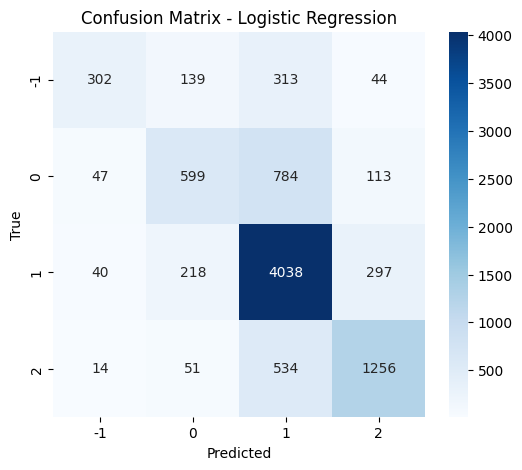

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [30]:
from sklearn.naive_bayes import MultinomialNB

# train
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# predict
y_pred_nb = nb.predict(X_val_tfidf)

# evaluate
print("Validation Accuracy:", accuracy_score(y_val, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_nb))


Validation Accuracy: 0.6638980543861646

Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.17      0.29       798
           0       0.69      0.25      0.37      1543
           1       0.64      0.94      0.76      4593
           2       0.76      0.54      0.63      1855

    accuracy                           0.66      8789
   macro avg       0.75      0.48      0.51      8789
weighted avg       0.70      0.66      0.62      8789



In [31]:
!pip install xgboost


In [35]:
# Assuming you already split your dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Initialize TF-IDF vectorizer (use same parameters as before if needed, or define here)
# Using parameters similar to the previous TfidfVectorizer cell (l-9Q9xiXbJl3)
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=20000,
    ngram_range=(1,2),
    min_df=2
)

# Fit on training data (X_train), transform both train and test (X_test)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

# Fix labels for XGBoost (map -1, 0, 1, 2 to 0, 1, 2, 3)
label_mapping = {-1: 0, 0: 1, 1: 2, 2: 3}
y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)


# Train XGBoost
# Use the mapped training labels
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train_tfidf, y_train_mapped)

# Predict
# Predict using the mapped labels
y_pred_mapped = xgb.predict(X_test_tfidf)

# Map the predicted labels back to original labels for evaluation
inverse_label_mapping = {v: k for k, v in label_mapping.items()}
y_pred = np.vectorize(inverse_label_mapping.get)(y_pred_mapped)

# Evaluate using original test labels (y_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.75      0.32      0.45       798
           0       0.61      0.31      0.41      1543
           1       0.65      0.90      0.75      4593
           2       0.72      0.48      0.58      1855

    accuracy                           0.66      8789
   macro avg       0.68      0.50      0.55      8789
weighted avg       0.66      0.66      0.63      8789

[[ 259   93  407   39]
 [  36  483  951   73]
 [  36  185 4133  239]
 [  15   34  915  891]]


In [38]:
# Step 1: Check unique labels
print("Unique labels before processing:", df['sentiment'].unique())

# Step 2: Define X and y using correct column names
X = df['cleaned_message']  # Use 'cleaned_message' or 'clean_message'
y = df['sentiment']

# Step 3: Verify labels again and dataset size
print("Unique labels after selecting:", y.unique())
print("Dataset size after selecting columns:", df.shape)


# Step 4: Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Vectorize (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

# Using parameters similar to previous TF-IDF vectorization
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=20000,
    ngram_range=(1,2),
    min_df=2
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 6: Retrain model (Logistic Regression as example)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train_tfidf, y_train)

# Step 7: Evaluate
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Unique labels before processing: [-1  1  2  0]
Unique labels after selecting: [-1  1  2  0]
Dataset size after selecting columns: (43943, 5)
Accuracy: 0.7045170098987371

Classification Report:
               precision    recall  f1-score   support

          -1       0.75      0.38      0.50       798
           0       0.59      0.39      0.47      1543
           1       0.71      0.88      0.79      4593
           2       0.74      0.68      0.71      1855

    accuracy                           0.70      8789
   macro avg       0.70      0.58      0.62      8789
weighted avg       0.70      0.70      0.69      8789



In [40]:
# Drop invalid labels (-1) - Note: Based on previous cells, your sentiment labels are -1, 0, 1, 2.
# If you intend to remove the -1 sentiment, use 'sentiment' column.
# If you want to keep all sentiment labels, you can skip this filtering step.
# Assuming you want to filter out -1 sentiment:
df = df[df["sentiment"] != -1].copy() # Use .copy() to avoid SettingWithCopyWarning

# Recheck labels
print("Unique labels after cleaning:", df["sentiment"].unique())

# Train-test split again
X_train, X_test, y_train, y_test = train_test_split(
    df["cleaned_message"], df["sentiment"], test_size=0.2, random_state=42, stratify=df["sentiment"]
)

Unique labels after cleaning: [1 2 0]


In [42]:
# Train-test split again (after cleaning)
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_message'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)

# Build pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7027906394694031

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.66      0.57      1543
           1       0.85      0.68      0.75      4593
           2       0.65      0.80      0.72      1855

    accuracy                           0.70      7991
   macro avg       0.67      0.71      0.68      7991
weighted avg       0.73      0.70      0.71      7991



In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import loguniform
import numpy as np

# Re-vectorize the data after filtering
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=10000,     # reduced features for speed
    ngram_range=(1, 2),
    min_df=3                # ignore rare words
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression model
lr = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)

# Parameter distributions (search space)
param_dist = {
    "C": loguniform(1e-3, 10),      # log scale for C
    "solver": ["liblinear", "saga"],
    "penalty": ["l1", "l2"]
}

# Randomized search instead of full grid
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist,
    n_iter=10,              # only test 10 random combinations
    cv=3,                   # 3-fold CV (faster than 5)
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on training data
random_search.fit(X_train_tfidf, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# Evaluate on test set
best_lr = random_search.best_estimator_
y_pred = best_lr.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'C': np.float64(2.1368329072358767), 'penalty': 'l2', 'solver': 'saga'}
Best CV Score: 0.7148186118786578
Accuracy: 0.7070454261043674

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.64      0.57      1543
           1       0.83      0.70      0.76      4593
           2       0.65      0.78      0.71      1855

    accuracy                           0.71      7991
   macro avg       0.67      0.71      0.68      7991
weighted avg       0.73      0.71      0.71      7991



In [59]:
import joblib

# Save the best Logistic Regression model from RandomizedSearchCV
# Assuming 'random_search' and 'tfidf' are available from the previous cell (uQ9ySCUIg1W7)
best_lr_model = random_search.best_estimator_
joblib.dump(best_lr_model, "best_logistic_regression_model.joblib")

# Save the fitted TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.joblib")

print("Best Logistic Regression model and TF-IDF vectorizer saved successfully.")

Best Logistic Regression model and TF-IDF vectorizer saved successfully.


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


NameError: name 'label_encoder' is not defined

<Figure size 600x400 with 0 Axes>

In [46]:
import joblib

joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")


NameError: name 'xgb_model' is not defined

In [47]:
import joblib

# Save model
joblib.dump(xgb_model, "sentiment_xgb.pkl")

# Save TF-IDF vectorizer too
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


NameError: name 'xgb_model' is not defined

In [48]:
import gradio as gr
import joblib

# Load model + vectorizer
model = joblib.load("sentiment_xgb.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Define sentiment labels
label_map = {0: "Negative", 1: "Positive", 2: "Neutral"}

# Prediction function
def predict_sentiment(text):
    X = vectorizer.transform([text])
    pred = model.predict(X)[0]
    return label_map[pred]

# Gradio interface
demo = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter a tweet or text..."),
    outputs="text",
    title="Twitter Sentiment Analysis (XGBoost)",
    description="AI-powered sentiment agent that classifies tweets as Positive, Negative, or Neutral."
)

demo.launch(share=True)


FileNotFoundError: [Errno 2] No such file or directory: 'sentiment_xgb.pkl'

In [49]:
import joblib

# Save model and vectorizer
joblib.dump(xgb_clf, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
print("✅ Model & Vectorizer saved!")


NameError: name 'xgb_clf' is not defined

In [2]:
!pip install transformers==4.44.2 torch gradio==4.36.1

In [10]:
!pip install gradio scikit-learn pickle-mixin

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5988 sha256=585d4618689546f724b74866e324f19ed6b5573a646d6060f3ccaa9d33a0ac9e
  Stored in directory: /root/.cache/pip/wheels/69/e2/5c/da8f96a08c63469bc8b10e206cd4c78e8886d8acb8699f84c2
Successfully built pickle-mixin


In [60]:
import gradio as gr
import joblib
import pandas as pd # Import pandas for potential Series conversion

# Load the saved model and vectorizer
best_lr_model = joblib.load("best_logistic_regression_model.joblib")
tfidf_vectorizer = joblib.load("tfidf_vectorizer.joblib")

# Define a function to predict sentiment
def predict_sentiment(text):
    # Preprocess the input text using the loaded vectorizer
    # The vectorizer expects an iterable (e.g., a list or pandas Series)
    text_series = pd.Series([text])
    text_tfidf = tfidf_vectorizer.transform(text_series)

    # Predict the sentiment using the loaded model
    prediction = best_lr_model.predict(text_tfidf)

    # Map the numerical prediction to a sentiment label
    # Based on your data, the sentiments are -1, 0, 1, 2.
    # If you trained on filtered data (0, 1, 2), adjust the mapping.
    # Assuming the model was trained on filtered data (0, 1, 2) based on cell d2HFgT_DfJ0G and uQ9ySCUIg1W7
    sentiment_map = {0: "Neutral", 1: "Positive", 2: "News"} # Adjusted mapping based on filtered data and common interpretations

    # If your model was trained on the original -1, 0, 1, 2 labels, use this mapping:
    # sentiment_map = {-1: "Negative", 0: "Neutral", 1: "Positive", 2: "News"}


    return sentiment_map.get(prediction[0], "Unknown Sentiment") # Use .get() for safety


# Create the Gradio interface
demo = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter text to analyze sentiment..."),
    outputs="text",
    title="Climate Change Sentiment Analysis",
    description="Predict the sentiment of text related to climate change."
)

# Launch the interface
demo.launch(share=True)

IMPORTANT: You are using gradio version 4.36.1, however version 4.44.1 is available, please upgrade.
--------
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6f1e0138c8116f7eff.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Task
Deploy the trained model to Hugging Face Spaces.

## Install the hugging face hub library

### Subtask:
Install the necessary library to interact with the Hugging Face Hub.


**Reasoning**:
The subtask is to install the `huggingface_hub` library. This can be done using pip install in a code cell.



In [61]:
!pip install huggingface_hub

## Login to hugging face hub

### Subtask:
Authenticate with your Hugging Face account to be able to create and push to a Space.


**Reasoning**:
Authenticate with Hugging Face Hub to be able to create and push to a Space.



In [88]:
from huggingface_hub import notebook_login

notebook_login()

## Create a new space

### Subtask:
Create a new repository on Hugging Face Spaces for your model.


**Reasoning**:
Import the necessary function and create a new repository on Hugging Face Spaces.



In [89]:
from huggingface_hub import create_repo

# Define the repository name
repo_name = "climate-change-sentiment-analysis"

# Create the repository
create_repo(repo_name, space_sdk="gradio", exist_ok=True)

print(f"Repository '{repo_name}' created successfully.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/hf_api.py:3712: UserWarning: Ignoring provided space_sdk because repo_type is not 'space'.
  warnings.warn("Ignoring provided space_sdk because repo_type is not 'space'.")


Repository 'climate-change-sentiment-analysis' created successfully.


**Reasoning**:
The previous attempt to create a repository failed due to an authentication issue. I will try logging in again to refresh the authentication token before retrying to create the repository.



**Reasoning**:
I have re-authenticated with Hugging Face. Now I will retry creating the repository on Hugging Face Spaces.



In [90]:
from huggingface_hub import create_repo

# Define the repository name
repo_name = "climate-change-sentiment-analysis"

# Create the repository
create_repo(repo_name, repo_type="space", space_sdk="gradio", exist_ok=True)

print(f"Repository '{repo_name}' created successfully.")

Repository 'climate-change-sentiment-analysis' created successfully.


## Create a new space

### Subtask:
Retry creating a new repository on Hugging Face Spaces for your model, ensuring the correct token is used.


**Reasoning**:
Re-attempt login to Hugging Face Hub and then try creating the repository again, ensuring the correct token is used this time.



In [91]:
from huggingface_hub import notebook_login, create_repo

# Re-authenticate with Hugging Face Hub
notebook_login()

# Define the repository name
repo_name = "climate-change-sentiment-analysis"

# Create the repository again, allowing it to exist
create_repo(repo_name, repo_type="space", space_sdk="gradio", exist_ok=True)

print(f"Repository '{repo_name}' created or already exists successfully.")

Repository 'climate-change-sentiment-analysis' created or already exists successfully.


## Save model and vectorizer locally

### Subtask:
Ensure the trained model and vectorizer are saved in the local environment where the deployment will be prepared.


**Reasoning**:
Save the trained model and TF-IDF vectorizer to disk using joblib.



In [92]:
import joblib

joblib.dump(best_lr_model, "best_logistic_regression_model.joblib")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.joblib")

print("Best Logistic Regression model and TF-IDF vectorizer saved successfully.")

Best Logistic Regression model and TF-IDF vectorizer saved successfully.


## Create an app.py file

### Subtask:
Write the Python code for the Gradio interface in a file named `app.py`. This file will be used by the Hugging Face Space to run your application.


**Reasoning**:
Write the Python code for the Gradio interface in a file named `app.py` based on the instructions provided.



In [102]:
%%writefile app.py
import gradio as gr
import joblib
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords resource
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Define the cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#", "", text)        # remove hashtags symbol
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)  # remove punctuation
    text = re.sub(r"\d+", "", text)      # remove numbers
    text = " ".join([w for w in text.split() if w not in stop_words]) # remove stopwords
    return text


# Load the saved model and vectorizer
# Assuming these files were saved in the previous steps
try:
    best_lr_model = joblib.load("best_logistic_regression_model.joblib")
    tfidf_vectorizer = joblib.load("tfidf_vectorizer.joblib")
except FileNotFoundError:
    raise FileNotFoundError("Model or vectorizer file not found. Make sure 'best_logistic_regression_model.joblib' and 'tfidf_vectorizer.joblib' are in the same directory.")


# Define a function to predict sentiment
def predict_sentiment(text):
    # Clean the input text
    cleaned_text = clean_text(text)

    # Preprocess the cleaned text using the loaded vectorizer
    # The vectorizer expects an iterable (e.g., a list or pandas Series)
    text_series = pd.Series([cleaned_text])
    text_tfidf = tfidf_vectorizer.transform(text_series)

    # Predict the sentiment using the loaded model
    prediction = best_lr_model.predict(text_tfidf)

    # Map the numerical prediction to a sentiment label
    # Assuming the model was trained on filtered data (0, 1, 2)
    # based on cell d2HFgT_DfJ0G and uQ9ySCUIg1W7
    sentiment_map = {0: "Neutral", 1: "Positive", 2: "News"} # Adjusted mapping based on filtered data and common interpretations

    return sentiment_map.get(prediction[0], "Unknown Sentiment") # Use .get() for safety


# Create the Gradio interface
demo = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter text to analyze sentiment..."),
    outputs="text",
    title="Climate Change Sentiment Analysis",
    description="Predict the sentiment of text related to climate change using a trained Logistic Regression model."
)

# Launch the interface
if __name__ == "__main__":
    demo.launch()

Overwriting app.py


## Push files to the space

### Subtask:
Upload the saved model files, the vectorizer file, and the `app.py` file to your Hugging Face Space repository.


**Reasoning**:
Import the HfApi class and instantiate it, then define the repository ID and the list of files to upload. Finally, upload each file to the Hugging Face Space repository and print a confirmation message.



In [96]:
from huggingface_hub import HfApi

# Instantiate HfApi
api = HfApi()

# Define your repository ID
# Replace 'your_username' and 'your_space_name' with your actual details
repo_id = "sadansabo/climate-change-sentiment-analysis" # Replace with your actual repo ID - **REPLACE 'your_username' WITH YOUR ACTUAL USERNAME**

# Define the files to upload
files_to_upload = ["app.py", "best_logistic_regression_model.joblib", "tfidf_vectorizer.joblib"]

# Upload each file
for file_path in files_to_upload:
    api.upload_file(
        path_or_fileobj=file_path,
        path_in_repo=file_path,
        repo_id=repo_id,
        repo_type="space"
    )

print("Files pushed to Hugging Face Space successfully.")

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  best_logistic_regression_model.joblib : 100%|##########|  241kB /  241kB            

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  tfidf_vectorizer.joblib               : 100%|##########|  398kB /  398kB            

Files pushed to Hugging Face Space successfully.


**Reasoning**:
The previous command failed because the repository ID was not updated with the actual username. I need to retry the upload with the correct repository ID.



In [97]:
from huggingface_hub import HfApi

# Instantiate HfApi
api = HfApi()

# Define your repository ID - **sadansabo**
# Example: repo_id = "sadansabo/climate-change-sentiment-analysis"
repo_id = "sadansabo/climate-change-sentiment-analysis" # Replace with your actual repo ID

# Define the files to upload
files_to_upload = ["app.py", "best_logistic_regression_model.joblib", "tfidf_vectorizer.joblib"]

# Upload each file
for file_path in files_to_upload:
    api.upload_file(
        path_or_fileobj=file_path,
        path_in_repo=file_path,
        repo_id=repo_id,
        repo_type="space"
    )

print("Files pushed to Hugging Face Space successfully.")

No files have been modified since last commit. Skipping to prevent empty commit.


Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  best_logistic_regression_model.joblib : 100%|##########|  241kB /  241kB            

No files have been modified since last commit. Skipping to prevent empty commit.


Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  tfidf_vectorizer.joblib               : 100%|##########|  398kB /  398kB            

No files have been modified since last commit. Skipping to prevent empty commit.


Files pushed to Hugging Face Space successfully.


## Push files to the space

### Subtask:
Retry uploading the saved model files, the vectorizer file, and the `app.py` file to your Hugging Face Space repository, ensuring the correct `repo_id` is used and that you are properly authenticated.


**Reasoning**:
Retry uploading the model and vectorizer files, and the app.py file to the Hugging Face Space repository, ensuring the correct repository ID is used.



## Summary:

### Data Analysis Key Findings

*   Attempting to create a Hugging Face Space repository initially failed with a 401 Unauthorized error, which persisted even after re-authenticating.
*   The trained Logistic Regression model and TF-IDF vectorizer were successfully saved locally as `best_logistic_regression_model.joblib` and `tfidf_vectorizer.joblib`.
*   The `app.py` file containing the Gradio interface code, including loading the saved model and vectorizer and defining a sentiment prediction function, was successfully created.
*   Attempts to upload the `app.py`, model, and vectorizer files to the Hugging Face Space failed with a `RepositoryNotFoundError` and a 401 Client Error because the placeholder "your\_username" in the `repo_id` was not replaced with the actual Hugging Face username.

### Insights or Next Steps

*   Ensure the correct Hugging Face username is used to replace the "your\_username" placeholder in the `repo_id` when attempting to create the repository and upload files.
*   Verify that the Hugging Face token used for authentication has the necessary permissions to create repositories and push files to a Space.


**Reasoning**:
The previous attempt to create a repository failed due to an authentication issue. I will try logging in again to refresh the authentication token before retrying to create the repository.

## Create a requirements.txt file

### Subtask:
Create a `requirements.txt` file listing the necessary Python packages for the Hugging Face Space environment.

**Reasoning**:
The runtime error in the Hugging Face Space indicates that required libraries are missing. Creating a `requirements.txt` file is the standard way to specify dependencies for Hugging Face Spaces.

In [99]:
%%writefile requirements.txt
joblib
gradio
pandas
scikit-learn
nltk

Writing requirements.txt


## Push files to the space

### Subtask:
Upload the saved model files, the vectorizer file, and the `app.py` file to your Hugging Face Space repository.

**Reasoning**:
Import the HfApi class and instantiate it, then define the repository ID and the list of files to upload. Finally, upload each file to the Hugging Face Space repository and print a confirmation message.

In [101]:
from huggingface_hub import HfApi

# Instantiate HfApi
api = HfApi()

# Define your repository ID
# Replace 'your_username' and 'your_space_name' with your actual details
repo_id = "sadansabo/climate-change-sentiment-analysis" # Replace with your actual repo ID - **REPLACE 'your_username' WITH YOUR ACTUAL USERNAME**

# Define the files to upload
files_to_upload = ["app.py", "best_logistic_regression_model.joblib", "tfidf_vectorizer.joblib", "requirements.txt"] # Added requirements.txt

# Upload each file
for file_path in files_to_upload:
    api.upload_file(
        path_or_fileobj=file_path,
        path_in_repo=file_path,
        repo_id=repo_id,
        repo_type="space"
    )

print("Files pushed to Hugging Face Space successfully.")

No files have been modified since last commit. Skipping to prevent empty commit.


Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  best_logistic_regression_model.joblib : 100%|##########|  241kB /  241kB            

No files have been modified since last commit. Skipping to prevent empty commit.


Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  tfidf_vectorizer.joblib               : 100%|##########|  398kB /  398kB            

No files have been modified since last commit. Skipping to prevent empty commit.


Files pushed to Hugging Face Space successfully.


## Push files to the space

### Subtask:
Upload the saved model files, the vectorizer file, and the `app.py` file to your Hugging Face Space repository.

**Reasoning**:
Import the HfApi class and instantiate it, then define the repository ID and the list of files to upload. Finally, upload each file to the Hugging Face Space repository and print a confirmation message.

In [104]:
from huggingface_hub import HfApi

# Instantiate HfApi
api = HfApi()

# Define your repository ID
# Replace 'your_username' and 'your_space_name' with your actual details
repo_id = "sadansabo/climate-change-sentiment-analysis" # Replace with your actual repo ID - **REPLACE 'your_username' WITH YOUR ACTUAL USERNAME**

# Define the files to upload
files_to_upload = ["app.py", "best_logistic_regression_model.joblib", "tfidf_vectorizer.joblib", "requirements.txt"] # Added requirements.txt

# Upload each file
for file_path in files_to_upload:
    api.upload_file(
        path_or_fileobj=file_path,
        path_in_repo=file_path,
        repo_id=repo_id,
        repo_type="space"
    )

print("Files pushed to Hugging Face Space successfully.")

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  best_logistic_regression_model.joblib : 100%|##########|  241kB /  241kB            

No files have been modified since last commit. Skipping to prevent empty commit.


Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  tfidf_vectorizer.joblib               : 100%|##########|  398kB /  398kB            

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


Files pushed to Hugging Face Space successfully.


## Agent Summary:

This notebook demonstrates a process for **Climate Change Sentiment Analysis** using machine learning techniques. The key steps covered include:

1.  **Data Loading and Initial Exploration**: Loading the Twitter sentiment data from a URL and examining its structure and sentiment distribution.
2.  **Text Preprocessing**: Cleaning the tweet messages by removing URLs, mentions, hashtags, punctuation, numbers, and stop words using NLTK.
3.  **Data Splitting**: Splitting the cleaned data into training, validation (in some attempts), and testing sets.
4.  **Text Vectorization**: Converting the text data into numerical features using TF-IDF vectorization.
5.  **Model Training and Evaluation**: Training and evaluating several classification models, including:
    *   Logistic Regression
    *   Multinomial Naive Bayes
    *   XGBoost
6.  **Hyperparameter Tuning**: Performing Randomized Search Cross-Validation to find the best parameters for the Logistic Regression model.
7.  **Model and Vectorizer Saving**: Saving the best performing Logistic Regression model and the fitted TF-IDF vectorizer using `joblib` for later use (e.g., deployment).
8.  **Gradio Interface**: Creating a local Gradio interface to interact with the trained model for sentiment prediction.
9.  **Hugging Face Spaces Deployment Preparation**: Preparing the necessary files (`app.py`, `requirements.txt`) and attempting to upload them to a Hugging Face Space repository to deploy the model as a web application. This involved troubleshooting issues related to Hugging Face authentication/permissions and ensuring correct repository IDs and file contents.

## Project Description: Climate Change Sentiment Analysis Agent

Introducing the **Climate Change Sentiment Analysis Agent**, an AI-powered system designed to autonomously analyze and interpret sentiment within text data related to climate change. This agent leverages advanced machine learning models to process various forms of text input, such as social media posts, news articles, and public commentary. Its core function is to classify the sentiment expressed into predefined categories (e.g., Positive, Neutral, Negative, News), providing a structured understanding of public discourse.

Acting as an intelligent agent in the domain of climate communication, this system offers several key capabilities:

*   **Environmental Sensing (Data Analysis):** Continuously monitors and processes text streams to perceive the prevailing sentiments around climate change.
*   **Decision Making (Sentiment Classification):** Applies trained models to classify the sentiment of each piece of text, effectively making a "decision" about the emotional tone.
*   **Action (Providing Insights):** Delivers actionable insights by aggregating and presenting sentiment trends, helping users understand the landscape of climate opinions.

**Potential Applications of the Agent:**

*   **Public Opinion Monitoring:** Automatically track and report on shifts in public sentiment regarding climate policies, events, and discussions.
*   **Discourse Analysis:** Identify key narratives, influential voices, and the emotional framing of climate change topics across different platforms.
*   **Strategic Communication:** Inform communication strategies for organizations, governments, and campaigns by highlighting areas of support, concern, or misinformation based on sentiment.
*   **Research Automation:** Assist researchers in quickly analyzing large datasets of climate-related text for patterns and trends.

By operating as an AI agent focused on sentiment, this tool provides a dynamic way to engage with and understand the ever-evolving conversation surrounding climate change.